In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Book1.csv')

In [3]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, 1:11].values
y = dataset.iloc[:, -1].values
mean_data = np.mean(dataset.iloc[:,-1])
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regression_model.fit(X_train,y_train)
predicted = regression_model.predict(X_test)
RMSE = np.sqrt(np.sum(((y_test-predicted)**2)/len(y_test)))
RMSE

3.6856243824056314

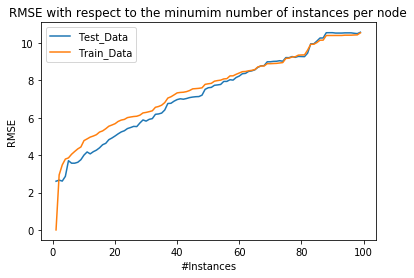

In [4]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
RMSE_train = []
RMSE_test = []
for i in range(1,100):
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    regression_model.fit(X_train,y_train)
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    RMSE_train.append(np.sqrt(np.sum(((y_train-predicted_train)**2)/len(y_train))))
    RMSE_test.append(np.sqrt(np.sum(((y_test-predicted_test)**2)/len(y_test))))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [7]:
testdata=dataset.iloc[:, 1:11].values
testpredicted=regression_model.predict(testdata)
dataframe=pd.DataFrame(testpredicted)
dataframe.to_csv(r'Irradiation.csv')